AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [16]:
import pandas as pd

# Load Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Print the first 10 rows
first_10_rows = titanic_df.head(10)

# Print the last 20 rows
last_20_rows = titanic_df.tail(20)

# Get dataset information
dataset_info = titanic_df.info()

# Get statistical summary
dataset_description = titanic_df.describe()

# Display all information
print("First 10 Rows:\n", first_10_rows)
print("\nLast 20 Rows:\n", last_20_rows)
print("\nDataset Info:\n", dataset_info)
print("\nDataset Description:\n", dataset_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
First 10 Rows:
    PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6    

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column



Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


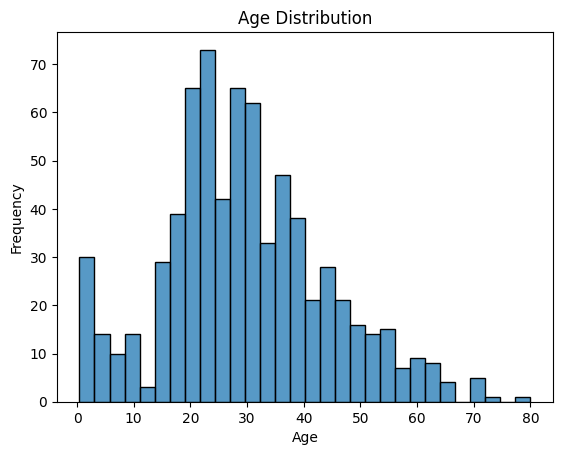

C:\Users\83961\AppData\Local\Temp\ipykernel_14888\238779298.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_median, inplace=True)
C:\Users\83961\AppData\Local\Temp\ipykernel_14888\238779298.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [17]:
# Count missing values
missing_values = titanic_df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# For Age column analysis
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Plotting Age distribution
sns.histplot(titanic_df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2 Central tendency - Mean vs. Median
age_mean = titanic_df['Age'].mean()
age_median = titanic_df['Age'].median()

# Fill missing values with median
titanic_df['Age'].fillna(age_median, inplace=True)

# 3. Handle missing values in Cabin
titanic_df['Cabin'].fillna('Unknown', inplace=True)

# 4. Handle missing values in Embarked
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# 5. Handle incorrect data in Survived (ensure values are 0 or 1)
titanic_df = titanic_df[titanic_df['Survived'].isin([0, 1])]

# 6. Handle incorrectly formatted Fare data
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Data type of Fare column: object
Average Fare by Pclass:
 Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


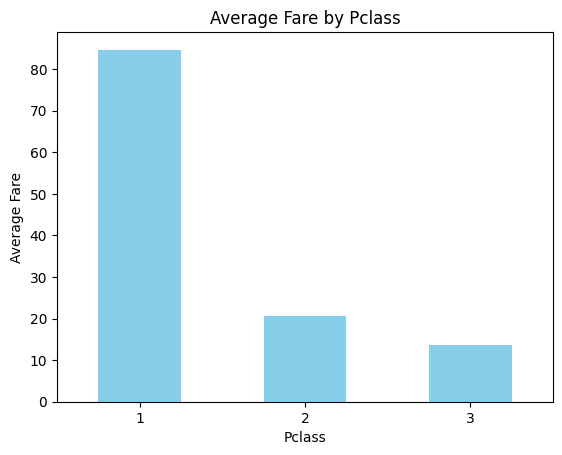

Average Fare by Sex:
 Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


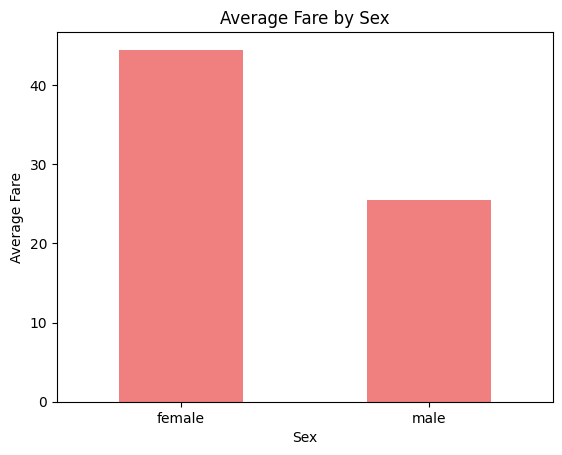

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Check data type of Fare column
print("Data type of Fare column:", titanic_df['Fare'].dtype)

# Convert Fare to numeric, coercing errors
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

# Calculate average fare by Pclass
avg_fare_pclass = titanic_df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Pclass:\n", avg_fare_pclass)

# Plotting Average Fare by Pclass
if not avg_fare_pclass.empty:
    avg_fare_pclass.plot(kind='bar', color='skyblue')
    plt.title('Average Fare by Pclass')
    plt.xlabel('Pclass')
    plt.ylabel('Average Fare')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No data available for plotting.")

# Calculate average fare by Sex
avg_fare_sex = titanic_df.groupby('Sex')['Fare'].mean()
print("Average Fare by Sex:\n", avg_fare_sex)

# Plotting Average Fare by Sex
if not avg_fare_sex.empty:
    avg_fare_sex.plot(kind='bar', color='lightcoral')
    plt.title('Average Fare by Sex')
    plt.xlabel('Sex')
    plt.ylabel('Average Fare')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No data available for plotting.")



AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

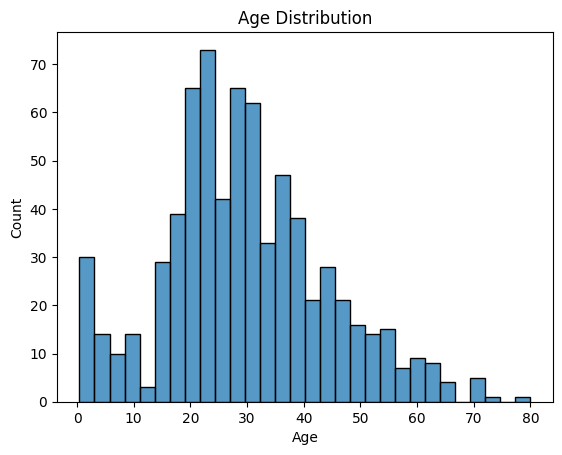

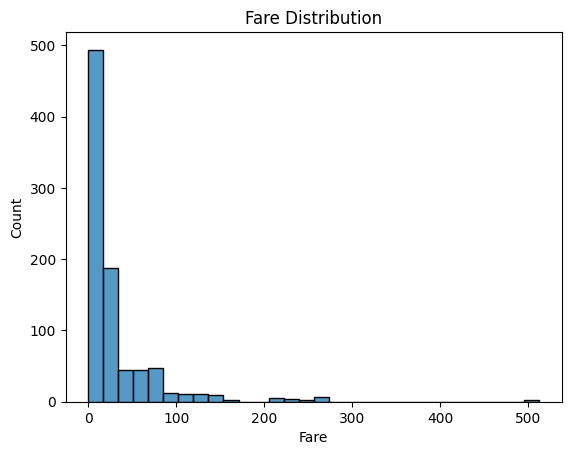

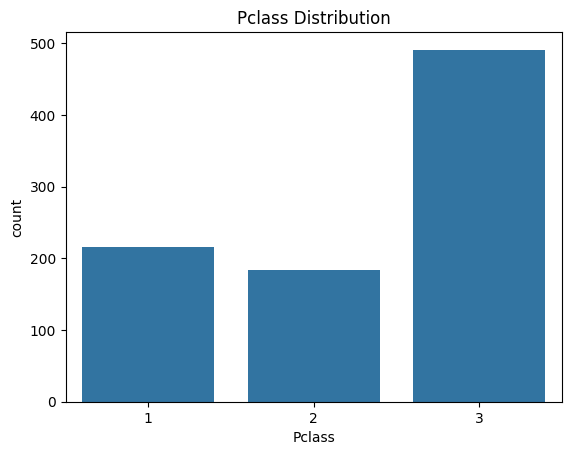

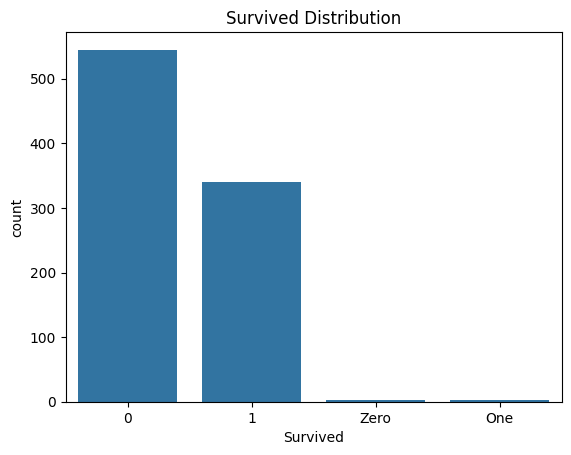

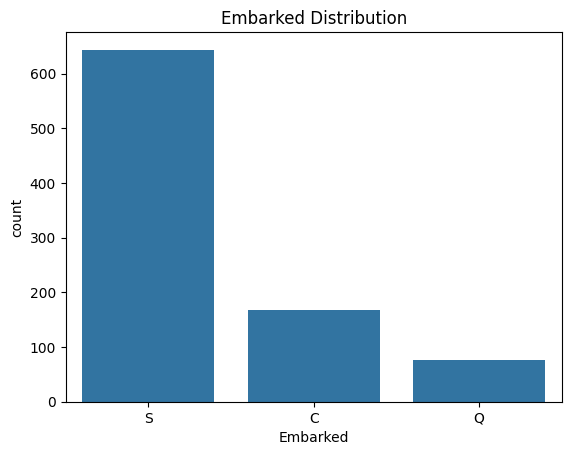

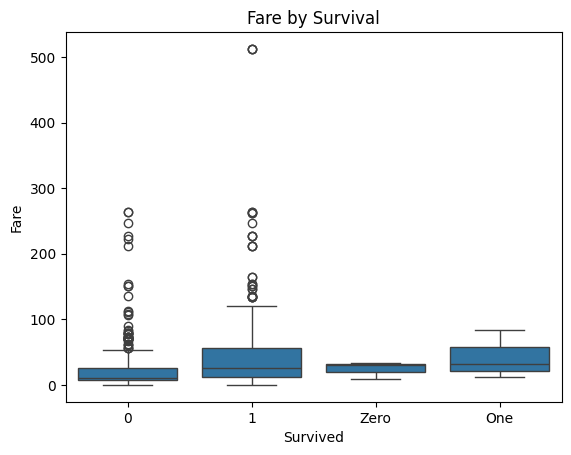

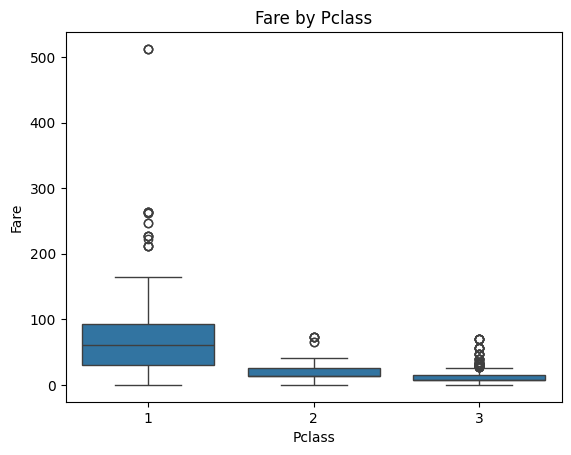

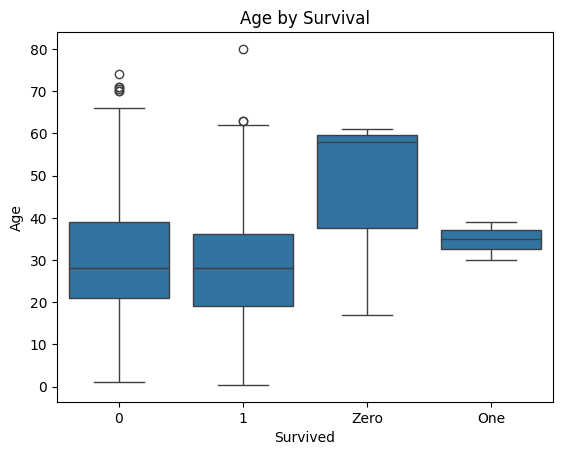

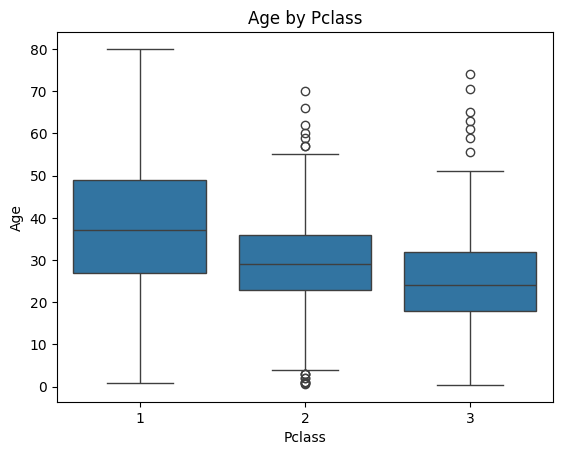

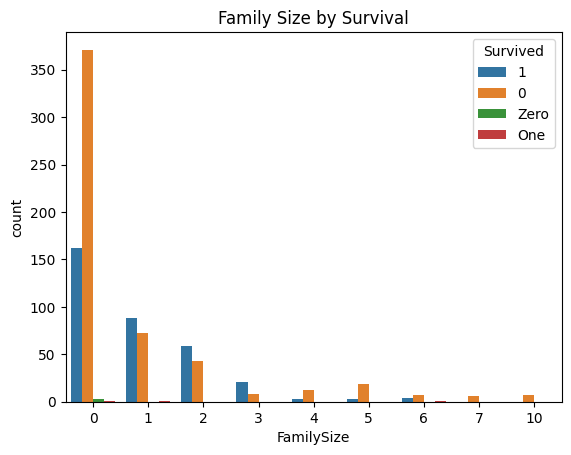

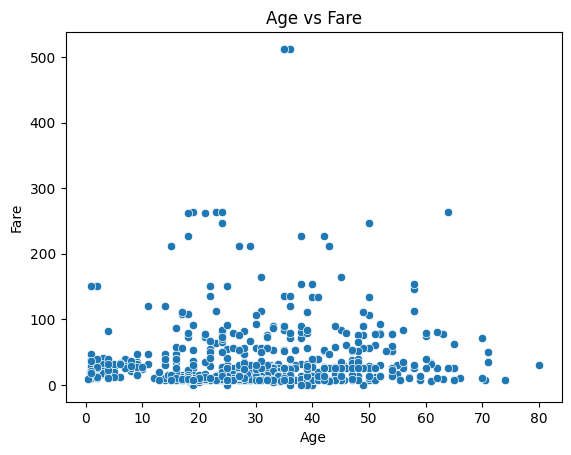

In [20]:
# Distribution of Age
sns.histplot(titanic_df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

# Distribution of Fare
sns.histplot(titanic_df['Fare'], bins=30)
plt.title('Fare Distribution')
plt.show()

# Distribution of Pclass
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Distribution')
plt.show()

# Distribution of Survived
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived Distribution')
plt.show()

# Distribution of Embarked
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarked Distribution')
plt.show()

# Fare grouped by Survived
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare by Survival')
plt.show()

# Fare grouped by Pclass
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare by Pclass')
plt.show()

# Age grouped by Survived
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age by Survival')
plt.show()

# Age grouped by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age by Pclass')
plt.show()

# Combined SibSp and Parch
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)
plt.title('Family Size by Survival')
plt.show()

# Age vs Fare relationship
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Age vs Fare')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

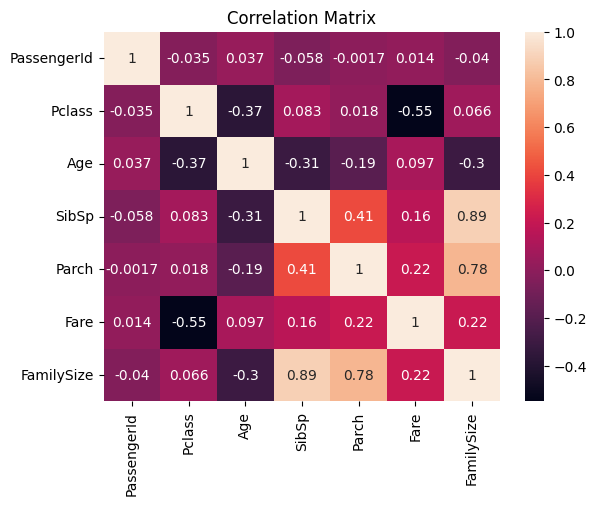


Correlation between Age and Fare: 0.09651129963357945


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



numeric_df = titanic_df.select_dtypes(include=['number'])


correlation_matrix = numeric_df.corr()


sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


age_fare_correlation = titanic_df['Age'].corr(titanic_df['Fare'])
print("\nCorrelation between Age and Fare:", age_fare_correlation)
